In [39]:
#import libarries needed for this notbook
import numpy as np
import pandas as pd


import matplotlib.pyplot as plt

import nltk
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('omw-1.4')
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
import string

from collections import Counter
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn import svm
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, ConfusionMatrixDisplay

import pickle


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\haanh\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\haanh\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\haanh\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\haanh\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


Import spam dataset from Kaggle (spam.csv) 
Link to dataset: https://www.kaggle.com/datasets/mfaisalqureshi/spam-email

In [10]:
#import the dataset to notebook
spam_dataset = pd.read_csv('spam.csv')

In [11]:
#inspect the dataset
spam_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Category  5572 non-null   object
 1   Message   5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


In [12]:
#print the first 10 lines in the dataset
spam_dataset.head(10)

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
5,spam,FreeMsg Hey there darling it's been 3 week's n...
6,ham,Even my brother is not like to speak with me. ...
7,ham,As per your request 'Melle Melle (Oru Minnamin...
8,spam,WINNER!! As a valued network customer you have...
9,spam,Had your mobile 11 months or more? U R entitle...


In [13]:
#remove duplicated tuples
spam_dataset.drop_duplicates(inplace= True)
#check the dataset of the removing duplicates
spam_dataset.shape

(5157, 2)

Data exploration: 
- What is the number of spam and ham (non-spam) messages?
- What are the most frequent words in both categories?

Category
ham     4516
spam     641
dtype: int64


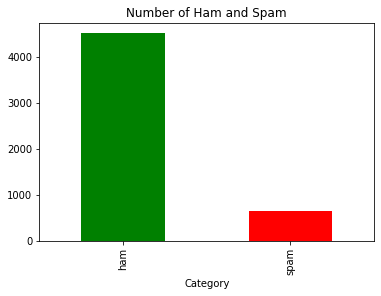

In [28]:
count_Class = spam_dataset.value_counts(spam_dataset["Category"], sort = True)
print(count_Class)
count_Class.plot(kind = 'bar', color =["green", "red"])
plt.title('Number of Ham and Spam')
plt.show()

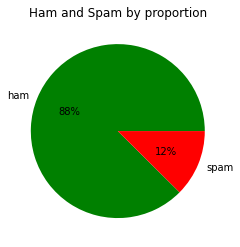

In [27]:
count_Class.plot(kind = 'pie', autopct='%1.0f%%',  colors =["green", "red"])
plt.title('Ham and Spam by proportion')
plt.ylabel('')
plt.show()

In [29]:
#preparing text data
def handle_message(message): #missing Lemmatization process
  # Step 1: lemmatization
  lemmatizer = WordNetLemmatizer()
  word_list = nltk.word_tokenize(message)
  message1 = ' '.join([lemmatizer.lemmatize(w) for w in word_list])
  # Step 2: remove puntuation 
  message2 = [char for char in message1 if char not in string.punctuation]
  message2 = ''.join(message2)
  # Step 3: remove stop word
  message3 = [word for word in message2.split() if word.lower() not in stopwords.words('english')]
  result = ' '.join(message3)
  return result

In [31]:
#prepare the data for visualization of text
from collections import Counter
ham_message = (handle_message(" ".join(spam_dataset[spam_dataset['Category']=='ham']["Message"]))).lower() # có thể cần dùng lower() 
count1 = Counter(ham_message.split()).most_common(20)
df1 = pd.DataFrame.from_dict(count1)
df1 = df1.rename(columns={0: "Words in non-spam", 1 : "Count"})

spam_message = (handle_message(" ".join(spam_dataset[spam_dataset['Category']=='spam']["Message"]))).lower()
count2 = Counter(spam_message.split()).most_common(20)
df2 = pd.DataFrame.from_dict(count2)
df2 = df2.rename(columns={0: "Words in spam", 1 : "Count"})

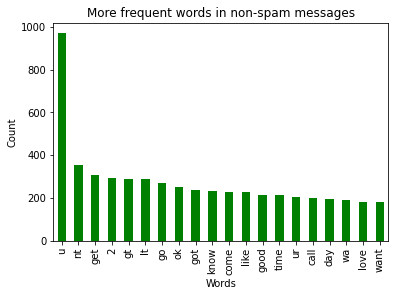

In [32]:
df1.plot.bar(legend = False, color = 'green')
y_pos = np.arange(len(df1["Words in non-spam"]))
plt.xticks(y_pos, df1["Words in non-spam"])
plt.title('More frequent words in non-spam messages')
plt.xlabel('Words')
plt.ylabel('Count')
plt.show()

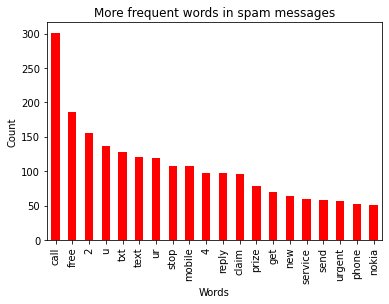

In [33]:
df2.plot.bar(legend = False, color = 'red')
y_pos = np.arange(len(df2["Words in spam"]))
plt.xticks(y_pos, df2["Words in spam"])
plt.title('More frequent words in spam messages')
plt.xlabel('Words')
plt.ylabel('Count')
plt.show()

In [34]:
#partitioning the dataset
from sklearn.model_selection import  train_test_split
x = spam_dataset['Message'].apply(handle_message)
y = spam_dataset["Category"].values
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size= 0.3)

In [35]:
cv = CountVectorizer()
train_feature = cv.fit_transform(x_train)
test_feature = cv.transform(x_test)
model = svm.SVC()
model.fit(train_feature,y_train)
print('Training accuracy:', model.score(train_feature,y_train))
print('Training accuracy:', model.score(test_feature,y_test))

Training accuracy: 0.9950124688279302
Training accuracy: 0.9741602067183462


Accuracy: 0.9950124688279302

Classification report: 

              precision    recall  f1-score   support

         ham       0.99      1.00      1.00      3154
        spam       1.00      0.96      0.98       455

    accuracy                           1.00      3609
   macro avg       1.00      0.98      0.99      3609
weighted avg       1.00      1.00      0.99      3609

Confusion matrix (0 is ham and 1 is spam): 



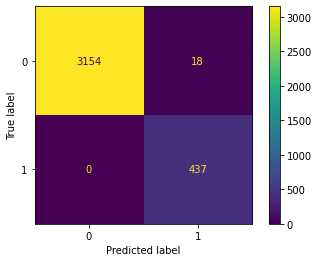

In [36]:
#Train detail
prediction = model.predict(train_feature)
print("Accuracy: {}".format(model.score(train_feature,y_train)))
print('\nClassification report: \n')
print(classification_report(y_train, prediction))
print('Confusion matrix (0 is ham and 1 is spam): \n')
confusion_matrix_plot = ConfusionMatrixDisplay(confusion_matrix(prediction,y_train))
confusion_matrix_plot.plot()
plt.show()

Accuracy: 0.9741602067183462

Classification report: 

              precision    recall  f1-score   support

         ham       0.97      1.00      0.99      1362
        spam       1.00      0.78      0.88       186

    accuracy                           0.97      1548
   macro avg       0.99      0.89      0.93      1548
weighted avg       0.97      0.97      0.97      1548

Confusion matrix (0 is ham and 1 is spam): 



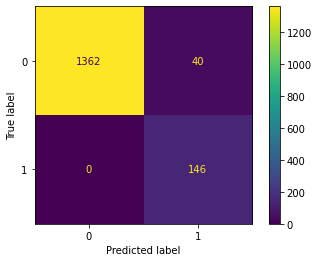

In [37]:
#Test detail
#Train detail
prediction = model.predict(test_feature)
print("Accuracy: {}".format(model.score(test_feature,y_test)))
print('\nClassification report: \n')
print(classification_report(y_test, prediction))
print('Confusion matrix (0 is ham and 1 is spam): \n')
confusion_matrix_plot = ConfusionMatrixDisplay(confusion_matrix(prediction,y_test))
confusion_matrix_plot.plot()
plt.show()

In [38]:
#export models
filename = "saved_model.pkl"
with open(filename, 'wb') as fout:
  pickle.dump((model, cv), fout)